<a href="https://colab.research.google.com/github/pratikNDL/ML_Lab/blob/main/Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


## **Data Import**

In [3]:

# data = pd.read_csv('')
iris = load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## **Data Cleaning**

In [4]:

data.drop_duplicates(inplace=True)
data.fillna(data.mean(), inplace=True)


## **Exploratory Data Analysis (EDA)**

In [5]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


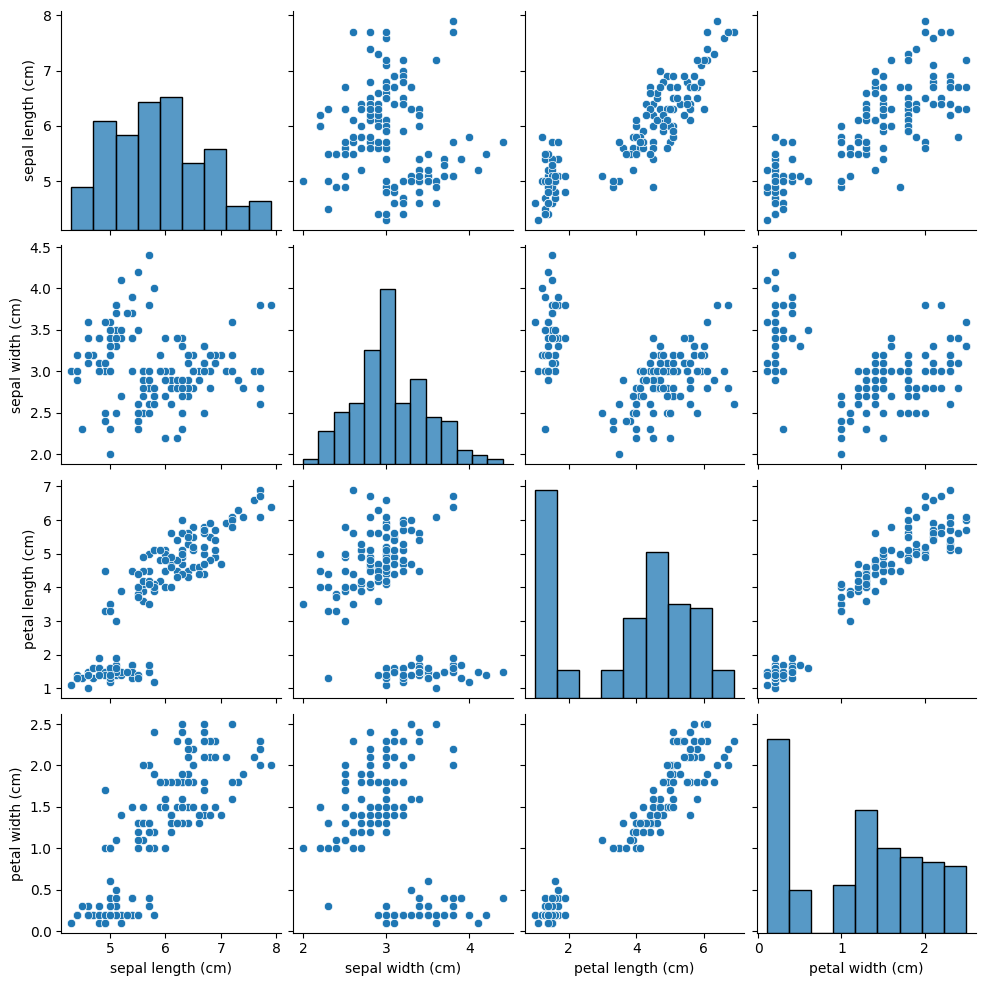

In [6]:
sns.pairplot(data)
plt.show()

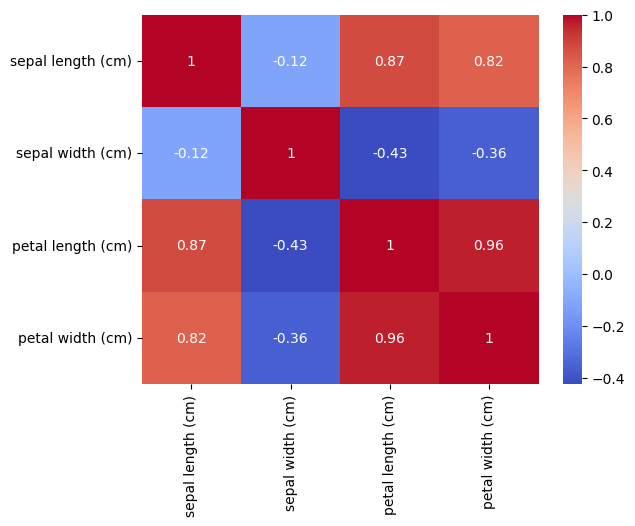

In [7]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

## **data Preprocessing**

In [8]:

data = pd.DataFrame(iris.data, columns=iris.feature_names)

data['species'] = iris.target
print(data.head())

# Encode the target labels (species) using LabelEncoder
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

# Feature scaling for the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('species', axis=1))

# Convert the scaled features back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=iris.feature_names)

# Add the encoded target column back to the scaled data
scaled_data['species'] = data['species']

# Display the first few rows of the scaled data
scaled_data.head()


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


## **Train-Test Split**

In [9]:

X = scaled_data.drop('species', axis=1)  # All columns except 'species'
y = scaled_data['species']  # The target column 'species'

# Split the dataset into training and testing sets
# Using 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the sizes of the training and testing sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 120 samples
Testing set size: 30 samples


## **Model Training**

## **LinearRegression**

In [10]:

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print(f'Training Score (Linear Regression): {linear_model.score(X_train, y_train)}')


Training Score (Linear Regression): 0.9343587750532076


## **LogisticRegression**

In [11]:

logistic_model = LogisticRegression(multi_class='ovr', max_iter=200)
logistic_model.fit(X_train, y_train)
print(f'Training Score (Logistic Regression): {logistic_model.score(X_train, y_train)}')


Training Score (Logistic Regression): 0.95


## **SVM**

In [12]:

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
print(f'Training Score (SVM): {svm_model.score(X_train, y_train)}')


Training Score (SVM): 0.975


## **DecisionTree**

In [13]:

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
print(f'Training Score (Decision Tree): {tree_model.score(X_train, y_train)}')


Training Score (Decision Tree): 1.0


# **CLustering**

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

# **Model Evaluation**

Confusion Matrix:
[[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.80      0.84        10
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30




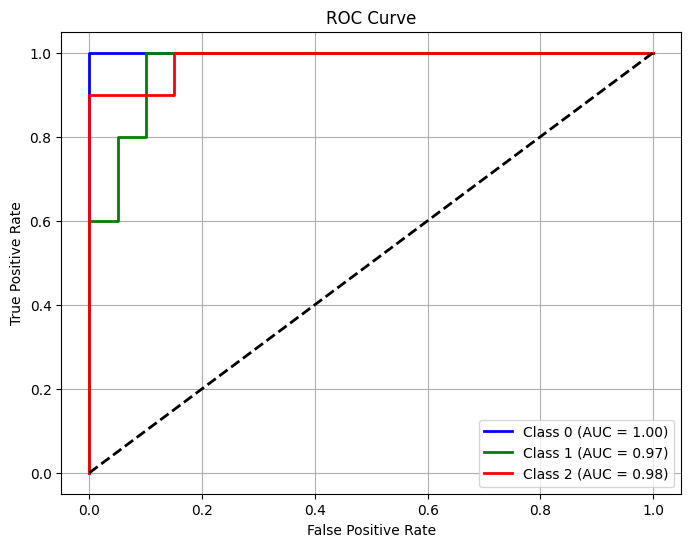

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30




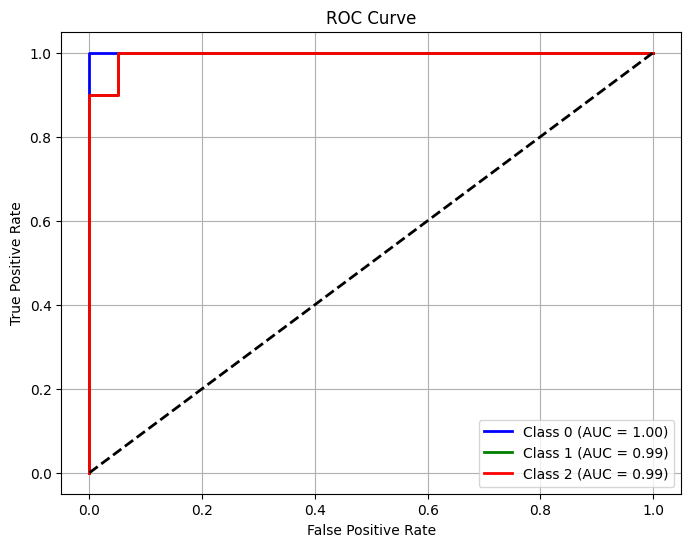

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30




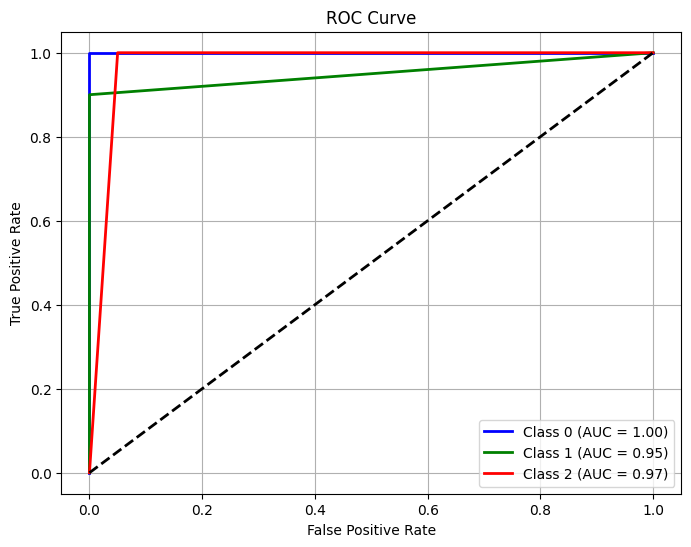

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    # Predict the labels for the test set (discrete class labels)
    y_pred = model.predict(X_test)

    # Print the confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{conf_matrix}\n')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}\n')

    # Plot the ROC curve if the model supports probability prediction
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)

        # For multi-class problems, calculate ROC curve and AUC for each class
        plt.figure(figsize=(8, 6))
        colors = ['blue', 'green', 'red']  # Add more colors if needed for more classes
        for i in range(len(np.unique(y_test))):
            fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

        # Plot the diagonal line for random guessing
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()
    else:
        print("ROC curve not available for this model (no predict_proba method).")

# Example: Evaluate a trained model (replace 'logistic_model' with any trained model you want to evaluate)
evaluate_model(logistic_model, X_test, y_test)
# evaluate_model(linear_model, X_test, y_test)
evaluate_model(svm_model, X_test, y_test)
evaluate_model(tree_model, X_test, y_test)
